# Introduction to AVIRIS-NG

<img alt="AVIRIS Logo" src="Aviris.png" style="margin:auto"/>

<b>Contributors:</b> Joachim Meyer<sup>1</sup>, Chelsea Ackroyd<sup>1</sup>, McKenzie Skiles<sup>1</sup>
<br>
<sup>1</sup>University of Utah


```{admonition} Learning Objectives

* Become familiar with hyperspectral data, including data orginiating from AVIRIS-NG
* Understand the fundamental methods for displaying and exploring hyperspectral data in Python
* Identify the amount of ice in a given pixel using spectral feature fitting methodology

```

## 1. Review of Hyperspectral Data

https://www.neonscience.org/resources/learning-hub/tutorials/hyper-spec-intro

### Spectral Resolution

Incoming solar radiation is either reflected, absorbed, or transmitted (or a combination of all three) depending on the surface material. This spectral response allows us to identify varying surface types (e.g. vegetation, snow, water, etc.) in a remote sensing image. The <b>spectral resolution</b>, or the wavelength interval, determines the amount of detail recorded in the spectral response: finer spectral resolutions have bands with narrow wavelength intervals, while coarser spectral resolutions have bands with larger wavelength intervals, and therefore, less detail in the spectral response.

![NEON Tutorial](https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/dev-aten/graphics/hyperspectral-general/spectrumZoomed.png)

![NEON FWHM](https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/dev-aten/graphics/hyperspectral-general/FWHM2.png)

### Multispectral vs. Hyperspectral Data

Multispectral instruments have larger spectral resolutions with fewer bands. This level of detail can be limiting in distinguishing between surface types. Hyperspectral instruments, in comparison, typically have hundreds of bands with relatively narrow wavelength intervals. The image below illustrates the difference in spectral responses between a multispectral (Landsat 8 OLI) and a hyperspectral (AVIRIS) sensor.

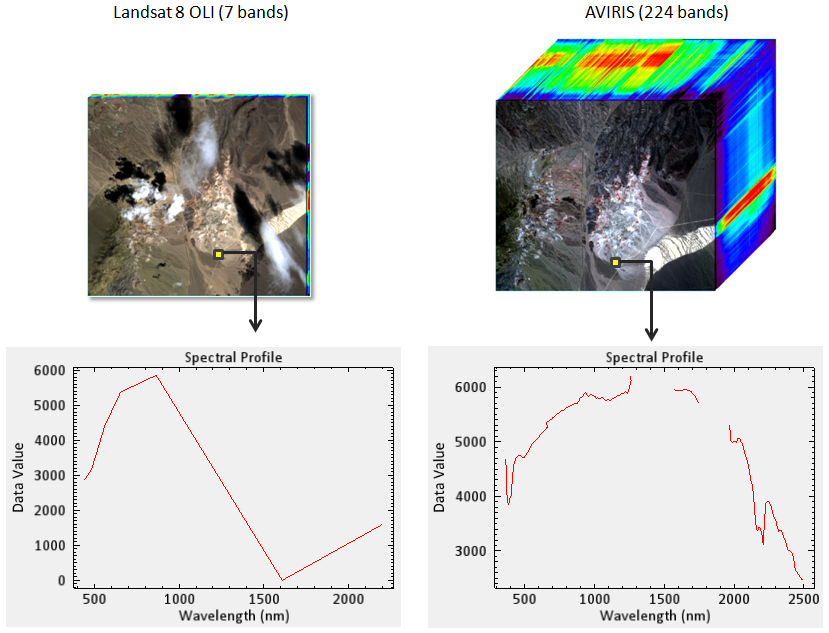

## 2. AVIRIS-NG Meets SnowEx
<br>
AVIRIS-NG measures upwelling radiance across 485 continuous spectral bands.
<br><br>
<table><thead>
<tr><th style="text-align:center">Flight Altitude</th><th style="text-align:center">Spatial Resolution</th><th style="text-align:center">Spectral Resolution</th><th style="text-align:center">Spectral Range</th><th style="text-align:center">2021 Flight Dates</th><th style="text-align:center">Study Sites</th></tr>
</thead>
<tbody>
    <tr><td style="text-align:center">25,000 ft ASL</td><td style="text-align:center">4 m</td><td style="text-align:center">5 nm</td><td style="text-align:center">380 nm to 2510 nm</td><td style="text-align:center">03/19, 04/11, 04/29</td><td style="text-align:center">Senator Beck Basin; Grand Mesa Study Plot</td></tr>
        
</tbody>
</table>
<br>

### Where can I get the data?

NSIDC (Soon public)

Data products:
* Spectral radiance/observation geometry (L1B)
* Corrected Reflectance (L2)


## 3. First look at the data

```{Important} 
You will always want the data file __and__ the header file when processing </div>
```

For today, we are dowloading and using a sub sample. The download is done via the Python [urllib.request](https://docs.python.org/3/library/urllib.request.html) native library.

In [ ]:
import urllib.request

1. The data file

In [ ]:
SBB_data_file = 'data/ang20210411t181022_rfl_v2z1a_img_SASP'
urllib.request.urlretrieve(
    'https://github.com/snowex-hackweek/tutorial-data/blob/main/SnowEx-2022/AVIRIS-NG/ang20210411t181022_rfl_v2z1a_img_SASP?raw=true',
    SBB_data_file
);

2. The header file

In [ ]:
SBB_header_file = 'data/ang20210411t181022_rfl_v2z1a_img_SASP.hdr'
urllib.request.urlretrieve(
    'https://raw.githubusercontent.com/snowex-hackweek/tutorial-data/main/SnowEx-2022/AVIRIS-NG/ang20210411t181022_rfl_v2z1a_img_SASP.hdr',
    SBB_header_file
);

3. The original header file (hold on tight on why ...)

In [ ]:
original_header_file = 'data/ang20210411t181022_rfl_v2z1a_img.hdr'
urllib.request.urlretrieve(
    'https://raw.githubusercontent.com/snowex-hackweek/tutorial-data/main/SnowEx-2022/AVIRIS-NG/ang20210411t181022_rfl_v2z1a_img.hdr',
    original_header_file
);

## Exploring many flight lines 

Interactive exploration using GeoPandas and the folium plotting library:
* https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html

In [ ]:
import geopandas
import folium

With a little help from GDAL, we can create an index for all flight lines and see where they are:
* https://gdal.org/programs/gdaltindex.html

A example command that creates a [GeoPackage](https://www.geopackage.org/)

```bash
gdaltindex -t_srs EPSG:4326 index.gpkg ang20210411t1*_rfl*img
```

#### Breaking down the command:
This command creates an index file `index.gpkg` for all flightlines starting with `ang20210411t1*` and selects only the reflectance prodcuts `_rfl*img`. The star `*` acts as a wildcard to include more than one file where the elements of the string as whole matches. The `-t_srs EPSG:4326` ensures that the read projection for all files will be stored as WGS 84 in the index. It does not change anything with the flight line data itself.
Specifically for hyperspectral data, it is important to _not_ include the header files (ending with `.hdr`). GDAL automatically reads those with every image file and adding them to the list of files would cause a duplication.

One way to test the included files is to use the search string with the list (`ls -l`) command in the terminal.
The `-l` option lists the output with one line per file.

Example:

```bash
ls index.gpkg ang20210411t1*_rfl*img
```

Sample output:
```bash
-rw-r--r-- 1 username groupname 2438534400 Feb 16 08:23 ang20210411t180555_rfl_v2z1a_img
-rw-r--r-- 1 username groupname 1611382400 Feb 16 08:24 ang20210411t181022_rfl_v2z1a_img
-rw-r--r-- 1 username groupname 1980166800 Feb 16 08:23 ang20210411t181414_rfl_v2z1a_img
-rw-r--r-- 1 username groupname 1898560000 Feb 16 08:23 ang20210411t181822_rfl_v2z1a_img
-rw-r--r-- 1 username groupname 9076497200 Feb 16 08:23 ang20210411t184544_rfl_v2z1a_img
-rw-r--r-- 1 username groupname 8742760000 Feb 16 08:23 ang20210411t185350_rfl_v2z1a_img
-rw-r--r-- 1 username groupname 8283032400 Feb 16 08:23 ang20210411t191149_rfl_v2z1a_img
-rw-r--r-- 1 username groupname 8161863200 Feb 16 08:23 ang20210411t191954_rfl_v2z1a_img
```

### Load the created index and some geo-spatial information into a Geo-Dataframe to explore interactively

GeoPandas has the ability to read files from disk or from a remote URL. When using a URL the information is held in memory for that session and will be lost once you restart the Python kernel.

In [ ]:
flight_lines = geopandas.read_file('https://github.com/snowex-hackweek/tutorial-data/blob/main/SnowEx-2022/AVIRIS-NG/20210411_flights.gpkg?raw=true')
sbb = geopandas.read_file('https://raw.githubusercontent.com/snowex-hackweek/tutorial-data/main/SnowEx-2022/AVIRIS-NG/SBB_basin.geojson')
swamp_angel = geopandas.read_file('https://raw.githubusercontent.com/snowex-hackweek/tutorial-data/main/SnowEx-2022/AVIRIS-NG/SwampAngel.geojson')

In [ ]:
# Create a map with multiple layers to explore where the lines are
## Layer 1 used as base layer
sbb_layer = sbb.explore(
    name='SBB basin',
    color='green'
)
## Layer 2
swamp_angel.explore(
    m=sbb_layer,                   ## Add this layer to the Layer 1
    name='Swamp Angel Study Plot'
)
## Layer 3
flight_lines.explore(
    m=sbb_layer,                   ## Add this layer to the Layer 1
    name='AVIRIS flight lines',
    column='location'
)
# Top right box to toggle layer visibility
folium.LayerControl().add_to(sbb_layer)

# Show the final map with all layer
sbb_layer

## Exploring a single flight line 

Check our current file location (This is called a [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html))

In [ ]:
%pwd

Which output we can store in a local variable

In [ ]:
home_folder = %pwd

Create absolute paths to our downloaded files

In [ ]:
SBB_data_file = f'{home_folder}/{SBB_data_file}'
SBB_header_file = f'{home_folder}/{SBB_header_file}'

### Spectral Python library 

```{seealso}

* https://www.spectralpython.net/
* https://github.com/spectralpython/spectral
```

In [ ]:
import spectral

In [ ]:
# Create a file object for the original image
image = spectral.open_image(SBB_header_file)

In [ ]:
# Get information about the bands
image.bands.centers

Darn ... we have an empty output. This subset was created using the GDAL library. Unfortunately, GDAL does not write the headers in a format that the spectral library recognizes. This is where the orignal header file comes into play. 

In [ ]:
import spectral.io.envi as envi

```{attention}
We are giving the original header, but the subset data file.
It's a workaround to get to the band information.
```

In [ ]:
header = envi.open(original_header_file, SBB_data_file)

### Find band index for a wavelength 

In [ ]:
import numpy as np

In [ ]:
type(header.bands)

Ahhh ... much better

In [ ]:
bands = np.array(header.bands.centers)

In [ ]:
bands

#### Define wavelengths for the colors we want

In [ ]:
red = 645
green = 510
blue = 440

In [ ]:
np.argmin(np.abs(bands - red))

In [ ]:
bands[54]

#### Create a method to get the values for many different wavelengths

In [ ]:
def index_for_band(band):
    # Return the index with the minimum difference between the target and available band center
    return np.argmin(np.abs(bands - band))

In [ ]:
index_for_band(green)

In [ ]:
index_for_band(blue)

### Inspection plot for selected bands 

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
#Increase the default figure output resolution
plt.rcParams['figure.dpi'] = 200

### Subset of Swamp Angle Study Plot (SASP)

Use GDAL warp to subset

```{toggle}

```bash
gdalwarp -co INTERLEAVE=BIL -of ENVI \                                   # Preserve the data as ENVI file
         -te 261469.404472 4198850.600453 261811.425717 4199084.295516 \ # The target extent
         ang20210411t181022_rfl_v2z1a_img                                # Source file
         ang20210411t181022_rfl_v2z1a_img_SASP                           # Destination file
```

```

Note:
* GeoTransform in header file

```{Important}
Going back to the original header file for the spatial information
```

In [ ]:
image = spectral.open_image(SBB_header_file)

In [ ]:
# Show some first image information
print(image)

In [ ]:
# Load the entire image into memory as an array
image_data = image.load()

#### Plot the image absed of the prevsiously determined band indices (BRG)

In [ ]:
view = spectral.imshow(image_data, (53,27,13), title = 'RGB of SASP')

```{admonition} Exercise
:class: dropdown

Pick the wavelenghts of your choice and plot the Swamp Angle Study plot.

Which bands did you pick?
Does the image look as expected?

Let's discuss the result with your neighbour.
```

## Introduction to Spectral Feature Fitting 

Using the Spectral Feature Fitting method, we can compare the absorption features within the image spectra to a reference spectra in order to identify the presence of a specific material within a given pixel. Here, we will demonstrate this using the ice absorption feature in a snow-covered pixel found within Swamp Angel Study Plot. 

### Load more data 

In [ ]:
absspec_fname = 'data/h2o_indices.csv'
urllib.request.urlretrieve(
    'https://raw.githubusercontent.com/snowex-hackweek/tutorial-data/main/SnowEx-2022/AVIRIS-NG/h2o_indices.csv',
    absspec_fname
);

#### Load the point of interest 

In [ ]:
roi = geopandas.read_file('https://raw.githubusercontent.com/snowex-hackweek/tutorial-data/main/SnowEx-2022/AVIRIS-NG/roi.geojson')

In [ ]:
sasp = swamp_angel.explore(
    name='Swamp Angel Study Plot',
    tiles="Stamen Terrain"
)
roi.explore(
    m=sasp,
    color='orange',
    
)

#### Find the coordinates in pixel space 

In [ ]:
import rasterio

with rasterio.open(SBB_data_file) as sbb_subset:
    x, y = sbb_subset.index(roi.geometry.x, roi.geometry.y) # The index methods returns arrays
    print(x[0], y[0])

#### Show the measured reflectance at this pixel 

In [ ]:
#plot spectrum for a given pixel
my_pixel = image_data[x[0], y[0]] 
plt.plot (bands, my_pixel, color='blue')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()

In [ ]:
# Read the file into a numpy array
absspec_fullres = np.loadtxt(absspec_fname, delimiter=",", skiprows=1)  # Skip the header row

In [ ]:
import math 
# Extract columns from array
wvl_nm_fullres = absspec_fullres[:, 0] # extract the wavelength column
wvl_cm_fullres = wvl_nm_fullres / 1e9 * 1e2  # convert wavelength from nm to cm
ice_k = absspec_fullres[:, 4] # get k for ice

# Calculate absorption coefficients in cm^-1
ice_abs_fullres = ice_k * math.pi * 4.0 / wvl_cm_fullres

# Plot absorption coefficients
plt.plot(wvl_nm_fullres, ice_abs_fullres, color='darkblue')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Coefficient ($cm^{-1}$)')
plt.show()

In [ ]:
# Calculate e-folding distances in cm
ice_efld_fullres = 1 / ice_abs_fullres

# Plot e-folding distance
plt.plot(wvl_nm_fullres, ice_efld_fullres, color='darkblue')
plt.xlabel('Wavelength (nm)')
plt.ylabel('e-folding distance (cm)')
plt.show()

In [ ]:
# Plot reflectance for example pixels of each cover type.
plt.plot (bands, image_data[20, 50], color='royalblue') # A bright iceberg pixel
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.xlim([400, 2500])
plt.ylim([0, 1.0])
plt.vlines(1028, 0.35, 0.55, color='gray', linestyle='dotted')
plt.show()

In [ ]:
from scipy.interpolate import CubicSpline

# Create CubicSpline functions that use the original absorption spectra wavelengths and values
ice_cs = CubicSpline(wvl_nm_fullres, ice_abs_fullres)

# Interpolate to AVIRIS-NG band center wavelengths
ice_abs_imgres = ice_cs(bands)

In [ ]:
# Set the absorption feature wavelength bounds for both abs features
lower_bound = 940
upper_bound = 1095

lower_bound_index = index_for_band(lower_bound)
upper_bound_index = index_for_band(upper_bound)

In [ ]:
# Remeber: Numpy's upper bound index is excluded. Hence +1
bands_in_feature = bands[lower_bound_index:upper_bound_index + 1]
band_index_in_feature = np.arange(lower_bound_index, upper_bound_index + 1)

In [ ]:
# Create an input X value array with wavelengths and ice abs coeffs
xval_array = np.transpose(
    np.column_stack((bands_in_feature, ice_abs_imgres[band_index_in_feature])).astype('float32'))
yval_array = my_pixel[band_index_in_feature]
print(xval_array.shape)
print(yval_array.shape)

In [ ]:
# Import 'nnls' and set up your x and y arrays
from scipy.optimize import nnls
x_values = np.transpose(
    np.array([
        np.ones_like(bands_in_feature), 
        bands_in_feature,
        -1 * bands_in_feature,
        ice_abs_imgres[band_index_in_feature]
    ])
)
print(x_values.shape)

y_values = my_pixel[band_index_in_feature]
print(y_values.shape)

In [ ]:
# Solve for a, b, d_water, and d_ice using nnls
coeff, resid = nnls(x_values, -np.log(y_values))
print(coeff)

# Look at the estimated water thickness
print("estimated ice thickness = {}".format(round(coeff[3], 3)))

In [ ]:
# Generate your modeled spectral feature from 'fit_water'
nnls_predicted_berg_abs = np.exp(-x_values.dot(coeff[:, np.newaxis]))

In [ ]:
# Plot both over your measured spectral feature
plt.figure()
plt.plot(bands_in_feature, my_pixel[band_index_in_feature], color = 'deepskyblue')
plt.plot(bands_in_feature, nnls_predicted_berg_abs, color = 'crimson', linestyle = '--')
plt.legend(['measured ice spectrum', 
            '\'nnls\' modeled ice spectrum'])
plt.show()

# Wrapping it up 